Insert Dependencies


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV Files

In [2]:
marvel_dc = pd.read_csv('final1.csv')


In [3]:
marvel_dc

,Unnamed: 0,NAME,ID,ALIGN,EYE,HAIR,SEX,GSM,APPEARANCES,YEAR,STUDIO
0,0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Heterosexual,4043,1962,MARVEL
1,1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,Heterosexual,3360,1941,MARVEL
2,3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,2961,1963,MARVEL
3,4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Heterosexual,2258,1950,MARVEL
4,5,Benjamin Grimm (Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,Heterosexual,2255,1961,MARVEL
...,...,...,...,...,...,...,...,...,...,...,...
15608,6522,Kay (New Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,1,1946,DC
15609,6523,Carnie Callahan (New Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,1,1944,DC
15610,6525,Frederick Devere (New Earth),Public Identity,Bad Characters,Blue Eyes,Black Hair,Male Characters,Heterosexual,1,1941,DC
15611,6526,Green Arrow (Oliver Queen),Secret Identity,Good Characters,Green Eyes,Blond Hair,Male Characters,Heterosexual,1,1941,DC


In [4]:
marvel_dc.columns

Index(['Unnamed: 0', 'NAME', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'GSM',
       'APPEARANCES', 'YEAR', 'STUDIO'],
      dtype='object')

In [5]:
# Separate target feature for training data and drop columns not being used
y = marvel_dc["ALIGN"]
X = marvel_dc.drop(columns=["Unnamed: 0", "ALIGN", "NAME", "APPEARANCES", "YEAR"])
X.head(10)

,ID,EYE,HAIR,SEX,GSM,STUDIO
0,Secret Identity,Hazel Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
1,Public Identity,Blue Eyes,White Hair,Male Characters,Heterosexual,MARVEL
2,Public Identity,Blue Eyes,Black Hair,Male Characters,Heterosexual,MARVEL
3,No Dual Identity,Blue Eyes,Blond Hair,Male Characters,Heterosexual,MARVEL
4,Public Identity,Blue Eyes,No Hair,Male Characters,Heterosexual,MARVEL
5,Public Identity,Brown Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
6,Public Identity,Brown Eyes,Brown Hair,Male Characters,Heterosexual,MARVEL
7,Public Identity,Blue Eyes,Blond Hair,Male Characters,Heterosexual,MARVEL
8,Public Identity,Blue Eyes,Blue Hair,Male Characters,Heterosexual,MARVEL
9,Public Identity,Blue Eyes,Blond Hair,Female Characters,Heterosexual,MARVEL


In [6]:
# Convert categorical data to numeric
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['ID_Identity Unknown', 'ID_Known to Authorities Identity',
       'ID_No Dual Identity', 'ID_Public Identity', 'ID_Secret Identity',
       'EYE_Amber Eyes', 'EYE_Auburn Hair', 'EYE_Black Eyeballs',
       'EYE_Black Eyes', 'EYE_Blue Eyes', 'EYE_Brown Eyes',
       'EYE_Compound Eyes', 'EYE_Gold Eyes', 'EYE_Green Eyes', 'EYE_Grey Eyes',
       'EYE_Hazel Eyes', 'EYE_Magenta Eyes', 'EYE_Multiple Eyes',
       'EYE_No Eyes', 'EYE_One Eye', 'EYE_Orange Eyes',
       'EYE_Photocellular Eyes', 'EYE_Pink Eyes', 'EYE_Purple Eyes',
       'EYE_Red Eyes', 'EYE_Silver Eyes', 'EYE_Variable Eyes',
       'EYE_Violet Eyes', 'EYE_White Eyes', 'EYE_Yellow Eyeballs',
       'EYE_Yellow Eyes', 'HAIR_Auburn Hair', 'HAIR_Bald', 'HAIR_Black Hair',
       'HAIR_Blond Hair', 'HAIR_Blue Hair', 'HAIR_Bronze Hair',
       'HAIR_Brown Hair', 'HAIR_Gold Hair', 'HAIR_Green Hair',
       'HAIR_Grey Hair', 'HAIR_Light Brown Hair', 'HAIR_Magenta Hair',
       'HAIR_No Hair', 'HAIR_Orange Hair', 'HAIR_Orange-b

,ID_Identity Unknown,ID_Known to Authorities Identity,ID_No Dual Identity,ID_Public Identity,ID_Secret Identity,EYE_Amber Eyes,EYE_Auburn Hair,EYE_Black Eyeballs,EYE_Black Eyes,EYE_Blue Eyes,...,SEX_Transgender Characters,SEX_Unknown,GSM_Bisexual Characters,GSM_Genderfluid Characters,GSM_Heterosexual,GSM_Homosexual Characters,GSM_Pansexual Characters,GSM_Transgender Characters,STUDIO_DC,STUDIO_MARVEL
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15608,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
15609,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
15610,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
15611,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [7]:
from sklearn.preprocessing import LabelEncoder

y_label = LabelEncoder().fit_transform(y)
y_label

array([1, 1, 1, ..., 0, 1, 1])

In [8]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

ML Models

In [9]:
# Train the logistic regression model and print the model score
from sklearn.linear_model import LogisticRegression

lrclf = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regression Training Score: {lrclf.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {lrclf.score(X_test, y_test)}')

Logistic Regression Training Score: 0.6518917072337518
Logistic Regression Testing Score: 0.6460040983606558


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {rfclf.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {rfclf.score(X_test, y_test)}')

Random Forest Training Score: 0.6822956699974378
Random Forest Testing Score: 0.6396004098360656


In [11]:
# Calculate feature importance in random forest
feature_importances = rfclf.feature_importances_

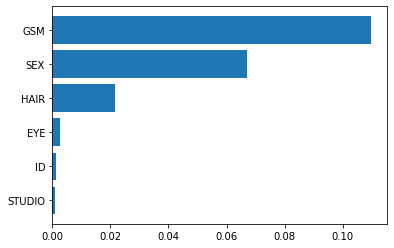

In [12]:
features = sorted(zip(X.columns, rfclf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

ax.barh(y=cols, width=width)

plt.show()

In [13]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfclf)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

print(f'Decision Tree Training Score: {dtclf.score(X_train, y_train)}')
print(f'Decision Tree Testing Score: {dtclf.score(X_test, y_test)}')

Decision Tree Training Score: 0.6822956699974378
Decision Tree Testing Score: 0.6398565573770492


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
etclf = ExtraTreesClassifier(random_state=1).fit(X_train, y_train)
# y_pred = clf.predict(X_test_scaled)

print(f'Extra Trees Training Score: {etclf.score(X_train, y_train)}')
print(f'Extra Trees Testing Score: {etclf.score(X_test, y_test)}')

Extra Trees Training Score: 0.6822956699974378
Extra Trees Testing Score: 0.6385758196721312


In [16]:
from sklearn.ensemble import AdaBoostClassifier
abclf = AdaBoostClassifier(random_state=1).fit(X_train, y_train)

print(f'Ada Boost Training Score: {abclf.score(X_train, y_train)}')
print(f'Ada Boost Testing Score: {abclf.score(X_test, y_test)}')

Ada Boost Training Score: 0.5900589290289521
Ada Boost Testing Score: 0.585297131147541


In [17]:
# Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

lrsclf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Logistic Regression Scaled Training Score: {lrsclf.score(X_train_scaled, y_train)}')
print(f'Logistic Regression Scaled Testing Score: {lrsclf.score(X_test_scaled, y_test)}')

Logistic Regression Scaled Training Score: 0.6519771116235374
Logistic Regression Scaled Testing Score: 0.6457479508196722


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [19]:
from sklearn.ensemble import RandomForestClassifier

rfsclf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {rfsclf.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {rfsclf.score(X_test_scaled, y_test)}')

Random Forest Scaled Training Score: 0.6822956699974378
Random Forest Scaled Testing Score: 0.6396004098360656


In [20]:
from sklearn.tree import DecisionTreeClassifier
dtsclf = DecisionTreeClassifier(random_state=1).fit(X_train_scaled, y_train)

print(f'Decision Tree Scaled Training Score: {dtsclf.score(X_train_scaled, y_train)}')
print(f'Decision Tree Scaled Testing Score: {dtsclf.score(X_test_scaled, y_test)}')

Decision Tree Scaled Training Score: 0.6822956699974378
Decision Tree Scaled Testing Score: 0.6398565573770492


In [21]:
from sklearn.ensemble import ExtraTreesClassifier
etsclf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)

print(f'Extra Trees Scaled Training Score: {etsclf.score(X_train_scaled, y_train)}')
print(f'Extra Trees Scaled Testing Score: {etsclf.score(X_test_scaled, y_test)}')

Extra Trees Scaled Training Score: 0.6822956699974378
Extra Trees Scaled Testing Score: 0.6385758196721312


In [22]:
from sklearn.ensemble import AdaBoostClassifier
absclf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)

print(f'Ada Boost Scaled Training Score: {absclf.score(X_train_scaled, y_train)}')
print(f'Ada Boost Scaled Testing Score: {absclf.score(X_test_scaled, y_test)}')

Ada Boost Scaled Training Score: 0.5900589290289521
Ada Boost Scaled Testing Score: 0.585297131147541


In [23]:
import tensorflow as tf

In [31]:
# Define the neural network model
num_features = len(X_train_scaled[0])
hidden_nodes_1 = 80
hidden_nodes_2 = 60
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_1, input_dim=num_features, activation='relu'))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_2, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                5920      
                                                                 
 dense_7 (Dense)             (None, 60)                4860      
                                                                 
 dense_8 (Dense)             (None, 1)                 61        
                                                                 
Total params: 10,841
Trainable params: 10,841
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6451 - accuracy: 0.6352
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6266 - accuracy: 0.6494
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6216 - accuracy: 0.6499
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.6536
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6174 - accuracy: 0.6577
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6154 - accuracy: 0.6586
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6137 - accuracy: 0.6616
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6138 - accuracy: 0.6593
Epoch 9/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6124 - accuracy: 0.6640
Epoch 10/100
366/366 [==============================] - 1s 2ms/step - loss: 0.6112 - accura